# Validation of the tSZ and kSZ effect

## Comparison of the tSZ and kSZ effect against SZpack

An obvious candidate for validating the tSZ and kSZ signals of `MockSZ` is the well-established `SZpack` [Chluba, 2012](https://www.jb.man.ac.uk/~jchluba/Science/SZpack/SZpack.html). 

We start by generating a purely thermal SZ signal, and compare this to a similar signal generated by `SZpack`. We set $T_e=15.33$ keV, $\tau_e=0.01$. To provide a comparison closest to `MockSZ`, we calculate the `SZpack` signal using the 3D integral mode.


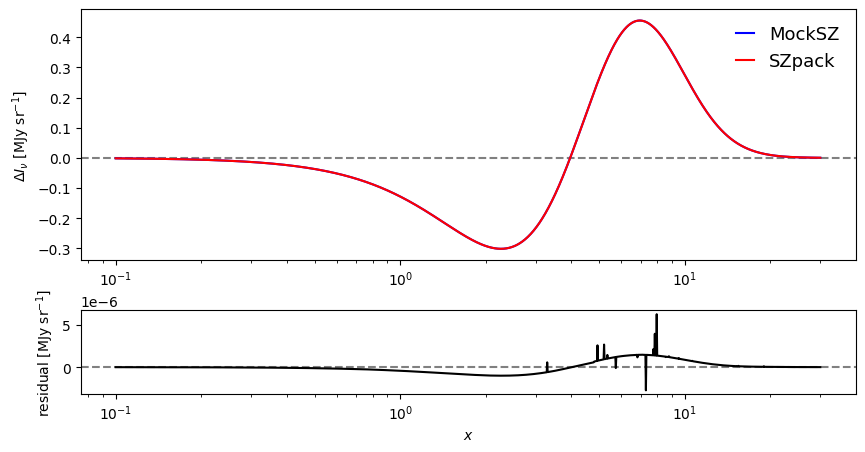

In [1]:
import matplotlib
import os

import numpy as np
import matplotlib.pyplot as pt

import MockSZ.Models as MModels
import MockSZ.Conversions as MConv

%matplotlib inline
simObj = MModels.SinglePointing()

xmin = 0.1                                                                                
xmax = 30                                                                                 
npts = 1500                                                                              
                                                                                          
tau_e = 0.01                                                                              
Te = 15.33           
beta_z = -0.01   
v_pec = beta_z * 3e8 * 1e-3

x_mock = np.logspace(np.log10(xmin), np.log10(xmax), npts)                               
nu_test = MConv.x_freq(x_mock)      
                                                                                          
I_tSZ = simObj.getSingleSignal_tSZ(nu_test, Te, tau_e, no_CMB=True)                            
I_kSZ = simObj.getSingleSignal_kSZ(nu_test, v_pec, tau_e, no_CMB=True)                   
                                                                                          
I_mock = MConv.SI_JySr(I_tSZ) * 1e-6

# Read cluster simulated with SZpack        
name = os.path.join("resources", "SZ_Integral.3D_nokSZ.dat")

x_pack = []                                                                                    
I_pack = []                                                                                   
with open(name, "r") as file:                                                             
    for line in file:                                                                     
        if line[0] == "#":                                                                
            continue                                                                      
        line = [float(x) for x in line.split(" ")]                                        
                                                                                          
        x_pack.append(line[0])                                                                 
        I_pack.append(line[-1])                                                      
                                                                                          
fig, ax = pt.subplots(2,1, figsize=(10,5), gridspec_kw={'height_ratios': [3, 1], "hspace":0.3})                                                
ax[0].plot(x_mock, I_mock, color="blue", label="MockSZ")                                                                
ax[0].plot(x_pack, I_pack, color="red", label="SZpack")   
ax[0].axhline(y=0, zorder=0, color="grey", ls="dashed")
ax[0].legend(frameon=False, prop={'size': 13},handlelength=1)

ax[0].set_xscale('log')
ax[0].set_ylabel(r"$\Delta I_\nu$ [MJy sr$^{-1}]$")
                                                        
ax[1].plot(x_pack, I_pack - I_mock, color="k")   
ax[1].axhline(y=0, zorder=0, color="grey", ls="dashed")

ax[1].set_xscale('log')
ax[1].set_xlabel("$x$")
ax[1].set_ylabel(r"residual [MJy sr$^{-1}]$")

pt.show()

We can see from the residuals that the difference is small, on the order of one in a millionth. For practical purposes, such as observational forecasts, where other effects might dominate the signal, these differences are negligible. This is a good sign that the tSZ signal calculated by `MockSZ`, without cluster velocity, is correct and that it can be used for real SZ simulations.

We can now compare a pure kSZ signal. We cannot evaluate the kSZ signal separately in 

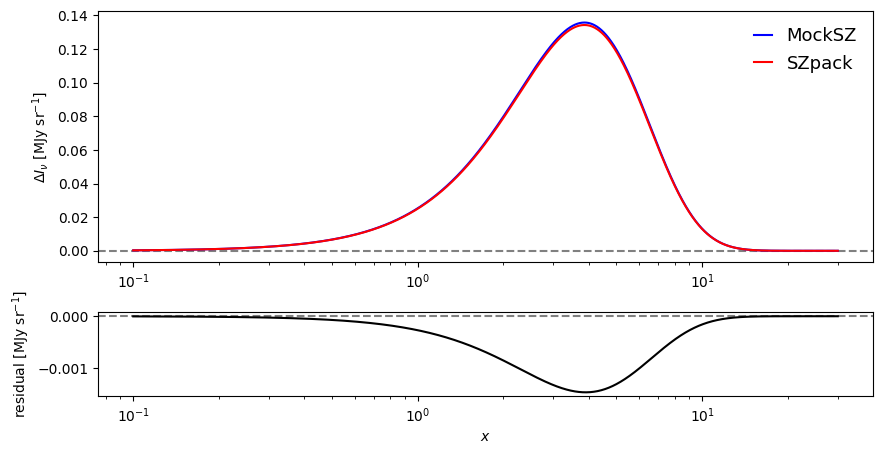

In [6]:
I_mock_kSZ = MConv.SI_JySr(I_kSZ) * 1e-6

# Read cluster simulated with SZpack        
name = os.path.join("resources", "SZ_Integral.3D_notSZ.dat")

I_pack_kSZ = []                                                                                   
with open(name, "r") as file:                                                             
    for line in file:                                                                     
        if line[0] == "#":                                                                
            continue                                                                      
        line = [float(x) for x in line.split(" ")]                                        
                                                               
        I_pack_kSZ.append(line[-1])                                                      
                                                                                          
fig, ax = pt.subplots(2,1, figsize=(10,5), gridspec_kw={'height_ratios': [3, 1], "hspace":0.3})                                                
ax[0].plot(x_mock, I_mock_kSZ, color="blue", label="MockSZ")                                                                
ax[0].plot(x_pack, I_pack_kSZ, color="red", label="SZpack")   
ax[0].axhline(y=0, zorder=0, color="grey", ls="dashed")
ax[0].legend(frameon=False, prop={'size': 13},handlelength=1)

ax[0].set_xscale('log')
ax[0].set_ylabel(r"$\Delta I_\nu$ [MJy sr$^{-1}]$")
                                                        
ax[1].plot(x_pack, I_pack_kSZ - I_mock_kSZ, color="k")   
ax[1].axhline(y=0, zorder=0, color="grey", ls="dashed")

ax[1].set_xscale('log')
ax[1].set_xlabel("$x$")
ax[1].set_ylabel(r"residual [MJy sr$^{-1}]$")

pt.show()

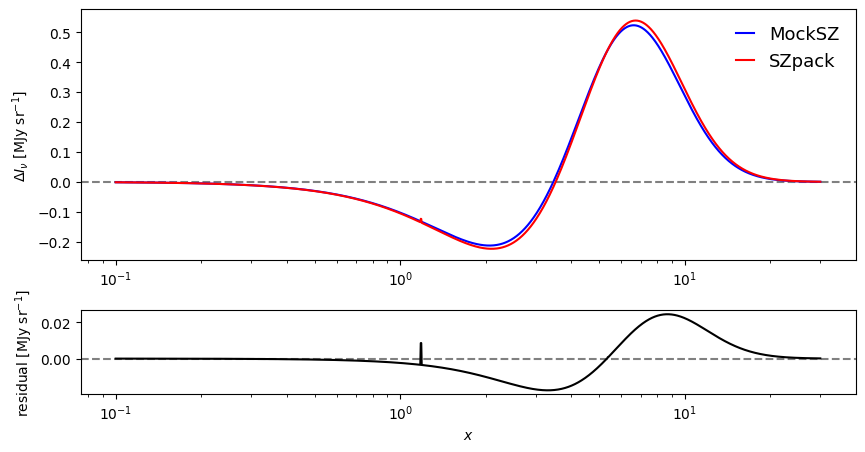

In [8]:
I_mock = MConv.SI_JySr(I_tSZ + I_kSZ) * 1e-6

# Read cluster simulated with SZpack        
name = os.path.join("resources", "SZ_Integral.3D.dat")
                                                                                  
I_pack = []                                                                                   
with open(name, "r") as file:                                                             
    for line in file:                                                                     
        if line[0] == "#":                                                                
            continue                                                                      
        line = [float(x) for x in line.split(" ")]                                        
                                                               
        I_pack.append(line[-1])                                                      
                                                                                          
fig, ax = pt.subplots(2,1, figsize=(10,5), gridspec_kw={'height_ratios': [3, 1], "hspace":0.3})                                                
ax[0].plot(x_mock, I_mock, color="blue", label="MockSZ")                                                                
ax[0].plot(x_pack, I_pack, color="red", label="SZpack")   
ax[0].axhline(y=0, zorder=0, color="grey", ls="dashed")
ax[0].legend(frameon=False, prop={'size': 13},handlelength=1)

ax[0].set_xscale('log')
ax[0].set_ylabel(r"$\Delta I_\nu$ [MJy sr$^{-1}]$")
                                                        
ax[1].plot(x_pack, I_pack - I_mock, color="k")   
ax[1].axhline(y=0, zorder=0, color="grey", ls="dashed")

ax[1].set_xscale('log')
ax[1].set_xlabel("$x$")
ax[1].set_ylabel(r"residual [MJy sr$^{-1}]$")

pt.show()